<a href="https://colab.research.google.com/github/ChairaWandau/tensor-contraction/blob/master/Samsonova/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\begin{align}
        \text{МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ}
    \end{align}
\begin{align}
        \text{ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ}
    \end{align}
\begin{align}
        \text{УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ}
    \end{align}
\begin{align}
        \text{«МОСКОВСКИЙ АВИАЦИОННЫЙ ИНСТИТУТ}
    \end{align}
\begin{align}
        \text{(НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ)»}
    \end{align}
\begin{align}
        \text{(ФГБОУ ВО «МАИ (НИУ)»)}
    \end{align}
\begin{align}
        \text{Кафедра 806}
    \end{align}
\begin{align}
        \text{«Вычислительная математика и программирование»}
    \end{align}
\begin{align}
        \text{}
    \end{align}
\begin{align}
        \text{ДОМАШНЯЯ РАБОТА}
    \end{align}
\begin{align}
        \text{}
    \end{align}
\begin{align}
        \text{по дисциплине «Матричные и тензорные вычисления»}
    \end{align}
\begin{align}
        \text{}
    \end{align}
\begin{align}
        \text{Тема: «Свертка тензоров»}
    \end{align}

\begin{align}
        \text{}
    \end{align}
\begin{align}
        \text{Выполнила студентка В.И. Самсонова}
    \end{align}
\begin{align}
        \text{Группа М8О-107М-22}
    \end{align}
\begin{align}
        \text{Преподаватель Д.Е. Пивоваров}
    \end{align}
\begin{align}
        \text{}
    \end{align}
\begin{align}
        \text{Москва}
    \end{align}
\begin{align}
        \text{2022}
    \end{align}

##Задание
Имеются 5 тензоров: А, В, С, D, E, которые соединены как на рисунке. Задача - осуществить свертку тремя способами:


1.   Используя цикл for;
2.   Используя функции reshape и матричное произведение;
3.   Используя пакет ncon.

Сравнить способы:


1.   По объему написания кода;
2.   По времени исполнения;

Провести проверку с помощью ncon.

Итогом свертки будет некий тензор R валентности 3.
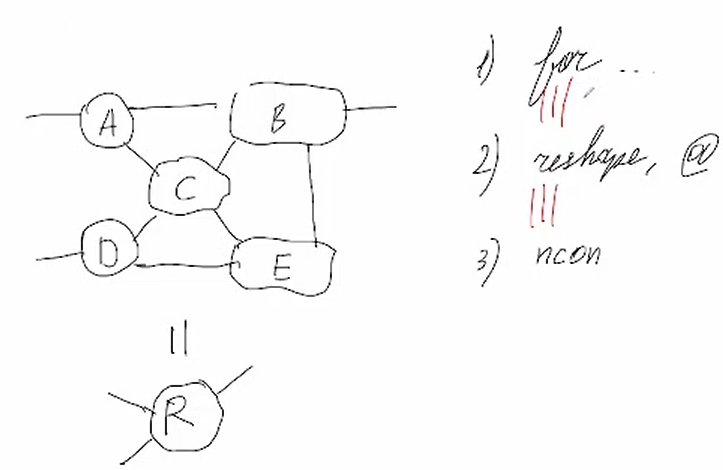

In [ ]:
# Устанавливаем ncon
!pip install ncon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Поключаем необходимые библиотеки
from ncon import ncon
import numpy as np
import time

In [ ]:
# Метод свертки с помощью циклов for
def convolution_for(a, b, c, d, e):
  '''
  a, b, c, d, e - тензоры
  '''
  # Начало отсчета времени выполнения свертки
  start = time.time()
  ac = np.zeros((1, 2, 7, 5, 8))
  for i in range(1):
    for j in range(2):
      for k in range(7):
        for l in range(5):
          for m in range(8):
            for n in range(6): 
              ac[i,j,k,l,m] = ac[i,j,k,l,m] + a[i,j,n] * c[n,k,l,m]
  acb = np.zeros((1, 5, 8, 1, 3))
  for i in range(1):
    for l in range(5):
      for m in range(8):
        for f in range(1):
          for o in range(3):
            for p in range(2):
              for r in range(7):  
                acb[i,l,m,f,o] = acb[i,l,m,f,o] + ac[i,p,r,l,m] * b[p,r,o,f]
  acbe = np.zeros((1, 5, 1, 4))
  for i in range(1):
    for l in range(5):
      for f in range(1):
        for s in range(4):
          for t in range(8):
            for u in range(3):
              acbe[i,l,f,s] = acbe[i,l,f,s] + acb[i,l,t,f,u] * e[u,t,s]
  result  = np.zeros((1, 1, 1))
  for i in range(1):
    for f in range(1):
      for h in range(1):
        for q in range(5):
          for r in range(4):
            result[i,f,h] =  result[i,f,h] + acbe[i,q,f,r] + d[r,q,h]
  # Конец отсчета времени выполнения свертки
  end = time.time() - start
  print("____FOR____")
  print(f"Shape = {result.shape}\nResult:{result}\nTime = {end}")

In [ ]:
# Метод свертки с помощью reshape и матричного умножения
def convolution_reshape(a, b, c, d, e):
  '''
  a, b, c, d, e - тензоры
  '''
  # Начало отсчета времени выполнения свертки
  start = time.time()
  ac = np.tensordot(a,c, axes=([2],[0]))
  #1 2 7 5 8    1, 2, 7, 5, 8
  acb = np.tensordot(ac,b, axes=([1,2],[0,-1]))
  print(acb.shape)
  #1 5 8 3 1   1, 5, 8, 1, 3
  acbe = np.tensordot(acb,e, axes=([2,3],[1,0]))
  # 1 5 1 4     1, 5, 1, 4
  result = np.tensordot(acbe,d, axes=([1,2],[1,2]))
  # Конец отсчета времени выполнения свертки
  end = time.time() - start
  print("____RESHAPE____")
  print(f"Shape = {result.shape}\nResult:{result}\nTime = {end}")

In [ ]:
# Метод свертки с помощью ncon
def convolution_ncon(a, b, c, d, e):
  '''
  a, b, c, d, e - тензоры
  '''
  # Начало отсчета времени выполнения свертки
  start = time.time()
  result = ncon((a, b, c, d, e), ([-1, 1, 5], [1, 6, 2, -2], [5, 6, 4, 7], [3, 4, -3], [2, 7, 3]))
  # Конец отсчета времени выполнения свертки
  end = time.time() - start
  print("____NCON____")
  print(f"Shape = {result.shape}\nResult:{result}\nTime = {end}")

Пронумеруем индексы как на картинке:

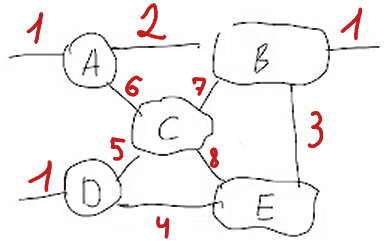

In [ ]:
# Тест
# Объявляем тензоры
a = np.random.uniform(-1,1,(1, 2, 6))
b = np.random.uniform(-1,1,(2, 7, 3, 1))
c = np.random.uniform(-1,1,(6, 7, 5, 8))
d = np.random.uniform(-1,1,(4, 5, 1))
e = np.random.uniform(-1,1,(3, 8, 4))
convolution_for(a, b, c, d, e)
convolution_reshape(a, b, c, d, e)
convolution_ncon(a, b, c, d, e)

____FOR____
Shape = (1, 1, 1)
Result:[[[-29.8465585]]]
Time = 0.006536245346069336


ValueError: ignored

По объему написания кода: 
for - больше всего, ncon - меньше всего.

По времени исполнения: 
for - больше всего, ncon - меньше всего.